In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

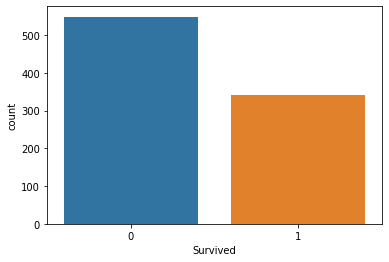

In [6]:
import seaborn as sns
sns.countplot(x='Survived',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

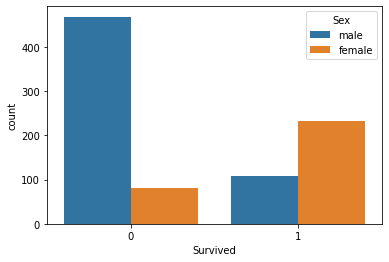

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

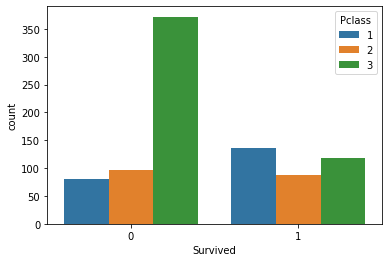

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

<AxesSubplot:ylabel='Frequency'>

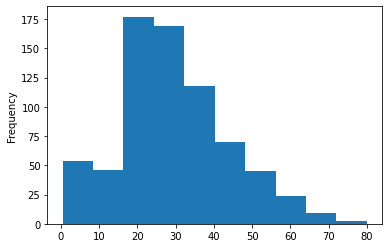

In [9]:
train_data["Age"].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

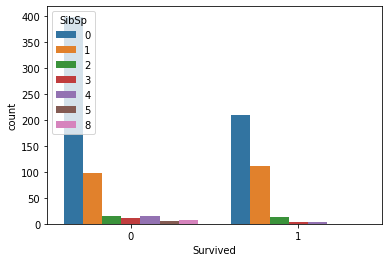

In [10]:
sns.countplot(x='Survived',hue='SibSp',data=train_data)

In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [12]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_data['Cabin'] = train_data['Cabin'].fillna('H')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,H,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,H,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:

train_data['Cabin'] = train_data['Cabin'].astype(str).str[0]
train_data.Cabin

0      H
1      C
2      H
3      C
4      H
      ..
886    H
887    B
888    H
889    C
890    H
Name: Cabin, Length: 891, dtype: object

In [16]:
train_data['Age'] = train_data['Age'].fillna(train_data.Age.median())
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,H,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,H,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [17]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data.Embarked.mode().iloc[0])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,H,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,H,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,H,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,H,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,H,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [18]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
train_df=train_data.drop(['Name','Ticket'],axis=1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,H,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,H,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,H,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,H,S
887,888,1,1,female,19.0,0,0,30.0000,B,S
888,889,0,3,female,28.0,1,2,23.4500,H,S
889,890,1,1,male,26.0,0,0,30.0000,C,C


In [20]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
s=(train_df.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Cabin', 'Embarked']


In [22]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(train_df[['Sex','Cabin','Embarked']])
train_df[['Sex','Cabin','Embarked']] = enc.transform(train_df[['Sex','Cabin','Embarked']])
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,7.0,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,2.0,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,7.0,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,7.0,2.0
5,6,0,3,1.0,28.0,0,0,8.4583,7.0,1.0
6,7,0,1,1.0,54.0,0,0,51.8625,4.0,2.0
7,8,0,3,1.0,2.0,3,1,21.0750,7.0,2.0
8,9,1,3,0.0,27.0,0,2,11.1333,7.0,2.0
9,10,1,2,0.0,14.0,1,0,30.0708,7.0,0.0


In [23]:
y=train_data.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
train_df1=train_df.drop(['Survived'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_df1,y,train_size=0.8,test_size=0.2, random_state=0)

In [26]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(712, 9)
(179, 9)
(712,)
(179,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor






#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)


# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]


In [28]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 0
Model 2 MAE: 0
Model 3 MAE: 0
Model 4 MAE: 0
Model 5 MAE: 0


In [29]:
modelr = RandomForestClassifier(n_estimators=50, random_state=0)
modelr.fit(X_train,y_train)
predict1=modelr.predict(X_test)
mae1=mean_absolute_error(predict1,y_test)
print('mean absolute error =',mae1)

mean absolute error = 0.16201117318435754


In [30]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict6=gnb.predict(X_test)
mae6=mean_absolute_error(predict6,y_test)
print('mean absolute error =',mae6)

mean absolute error = 0.17318435754189945


In [31]:
from xgboost import XGBRFRegressor

model= XGBRFRegressor(n_estimators=1, learning_rate=0.1)
model.fit(X_train,y_train)
predict=model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predict,y_test)
print('mean absolute error =',mae)

mean absolute error = 0.47478696837105566


In [32]:
from sklearn import linear_model
bayes = linear_model.BayesianRidge()
bayes.fit(X_train,y_train)
bay=bayes.predict(X_test)
mae_bay=mean_absolute_error(bay,y_test)
print('mean absolute error =',mae_bay)

mean absolute error = 0.2886898926481263


In [33]:
from sklearn import tree
clf1 = tree.DecisionTreeRegressor(max_depth=2)
clf2 = tree.DecisionTreeRegressor(max_depth=10)
clf2 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
tree1=clf1.predict(X_test)
tree2=clf2.predict(X_test)
mae1=mean_absolute_error(tree1,y_test)
mae2=mean_absolute_error(tree2,y_test)
print('mean absolute error =',mae1 , 'tree2',mae2)

mean absolute error = 0.2793019338913721 tree2 0.2793019338913721


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators=5000,random_state=1,max_depth=1000)
forest_model.fit(X_train,y_train)
preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test,preds))


0.23640111731843577


In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=300,leaf_size=300)
neigh.fit(X_train, y_train)

kn=bayes.predict(X_test)

k=mean_absolute_error(bay,y_test)

print('mean absolute error =',k)

mean absolute error = 0.2886898926481263


In [36]:
from sklearn import svm

clf3 = svm.SVC(random_state=1)
clf3.fit(X_train, y_train)
preds0 = clf3.predict(X_test)
mae_svm=mean_absolute_error(preds0,y_test)
print('mean absolute error =',mae_svm)

mean absolute error = 0.3407821229050279


In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

lin=reg.predict(X_test)
print(mean_absolute_error(y_test,lin))

0.28584309905875027


In [38]:
#from sklearn.model_selection import cross_val_score

In [39]:
#cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


In [40]:
#cross_val_score(LinearRegression(solver='liblinear',multi_class='ovr'),X_train,y_train,cv=3)


In [41]:
""""from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(mean_absolute_error(y_test,clf))
"""""

'"from sklearn.ensemble import RandomForestClassifier\n\nclf = RandomForestClassifier(max_depth=2, random_state=0)\nclf.fit(X_train, y_train)\n\nprint(mean_absolute_error(y_test,clf))\n'

In [42]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test_data['Age'] = test_data['Age'].fillna(test_data.Age.median())
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [44]:
test_data['Cabin'] = test_data['Cabin'].fillna('H')
test_data['Cabin'] = test_data['Cabin'].astype(str).str[0]
test_data.Cabin

0      H
1      H
2      H
3      H
4      H
      ..
413    H
414    C
415    H
416    H
417    H
Name: Cabin, Length: 418, dtype: object

In [45]:
test_df=test_data.drop(['Name','Ticket'],axis=1)

In [46]:
s=(test_df.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Cabin', 'Embarked']


In [47]:

enc.fit(test_df[['Sex','Cabin','Embarked']])
test_df[['Sex','Cabin','Embarked']] = enc.transform(test_df[['Sex','Cabin','Embarked']])
test_df.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1.0,34.5,0,0,7.8292,7.0,1.0
1,893,3,0.0,47.0,1,0,7.0000,7.0,2.0
2,894,2,1.0,62.0,0,0,9.6875,7.0,1.0
3,895,3,1.0,27.0,0,0,8.6625,7.0,2.0
4,896,3,0.0,22.0,1,1,12.2875,7.0,2.0
5,897,3,1.0,14.0,0,0,9.2250,7.0,2.0
6,898,3,0.0,30.0,0,0,7.6292,7.0,1.0
7,899,2,1.0,26.0,1,1,29.0000,7.0,2.0
8,900,3,0.0,18.0,0,0,7.2292,7.0,0.0
9,901,3,1.0,21.0,2,0,24.1500,7.0,2.0


In [48]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1.0,34.5,0,0,7.8292,7.0,1.0
1,893,3,0.0,47.0,1,0,7.0000,7.0,2.0
2,894,2,1.0,62.0,0,0,9.6875,7.0,1.0
3,895,3,1.0,27.0,0,0,8.6625,7.0,2.0
4,896,3,0.0,22.0,1,1,12.2875,7.0,2.0
5,897,3,1.0,14.0,0,0,9.2250,7.0,2.0
6,898,3,0.0,30.0,0,0,7.6292,7.0,1.0
7,899,2,1.0,26.0,1,1,29.0000,7.0,2.0
8,900,3,0.0,18.0,0,0,7.2292,7.0,0.0
9,901,3,1.0,21.0,2,0,24.1500,7.0,2.0


In [49]:
test_df.shape

(418, 9)

In [50]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,7.0,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,2.0,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,7.0,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.0,0,0,13.0000,7.0,2.0
887,888,1,1,0.0,19.0,0,0,30.0000,1.0,2.0
888,889,0,3,0.0,28.0,1,2,23.4500,7.0,2.0
889,890,1,1,1.0,26.0,0,0,30.0000,2.0,0.0


In [51]:
train_df1.shape

(891, 9)

In [52]:
test_df['Fare'] = test_df['Fare'].fillna(test_df.Fare.mode().iloc[0])
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1.0,34.5,0,0,7.8292,7.0,1.0
1,893,3,0.0,47.0,1,0,7.0000,7.0,2.0
2,894,2,1.0,62.0,0,0,9.6875,7.0,1.0
3,895,3,1.0,27.0,0,0,8.6625,7.0,2.0
4,896,3,0.0,22.0,1,1,12.2875,7.0,2.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,27.0,0,0,8.0500,7.0,2.0
414,1306,1,0.0,39.0,0,0,108.9000,2.0,0.0
415,1307,3,1.0,38.5,0,0,7.2500,7.0,2.0
416,1308,3,1.0,27.0,0,0,8.0500,7.0,2.0


In [53]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
#model_1.fit(X, y)
predictions = gnb.predict(test_df)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('RandomForest_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
